**Tugas 1**

 1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, `voice.csv`.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

### Data Load

In [2]:
data = pd.read_csv('../../Data/voice.csv')

### Preprocessing

In [3]:
X = data.drop(columns='label', axis = 1)  # Mengasumsikan kolom 'label' adalah target
y = data['label']

### Splitting Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model

In [5]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

### Evaluasi

In [6]:
y_pred = svm_model.predict(X_test)

# Print evaluation metrics
print(f"Akurasi : {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

Akurasi : 97.63%
Classification Report:
               precision    recall  f1-score   support

      female       0.96      0.99      0.98       297
        male       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



#### 2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

  1. Menggunakan data `spam.csv`
  2. Fitur `CountVectorizer` dengan mengaktifkan `stop_words`
  3. Evaluasi hasilnya

### Data Load

In [7]:
data = pd.read_csv('../../Data/spam.csv',  encoding='latin-1')

data = data[['v1', 'v2']]
data.columns = ['label', 'text']
X = data['text']
y = data['label']

### Splitting data & Stop Words

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Multinomial Naive Bayes
vectorizer = CountVectorizer(stop_words='english')


X_train_cv = vectorizer.fit_transform(X_train)
X_test_cv = vectorizer.transform(X_test)

### Model

In [9]:
nb_model = MultinomialNB()
nb_model.fit(X_train_cv, y_train)

MultinomialNB()

### Evaluasi

In [10]:
y_pred_cv = nb_model.predict(X_test_cv)

print(f"Accuracy (Count Vectorizer): {accuracy_score(y_test, y_pred_cv) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_cv))

Accuracy (Count Vectorizer): 98.39%
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



#### 3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

  1. Menggunakan data `spam.csv`

  2. Fitur `TF-IDF` dengan mengaktifkan `stop_words`

  3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.

  4. Berikan kesimpulan fitur mana yang terbaik pada kasus data `spam.csv`

### Data Load

In [11]:
data = pd.read_csv('../../Data/spam.csv',  encoding='latin-1')

data = data[['v1', 'v2']]
data.columns = ['label', 'text']
X = data['text']
y = data['label']

### Splitting data & Stop Words

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

### Model

In [13]:
nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

### Evaluasi

In [14]:
y_pred_tfidf = nb_model_tfidf.predict(X_test_tfidf)

# Menampilkan akurasi dan classification report
print(f"Accuracy (TF-IDF): {accuracy_score(y_test, y_pred_tfidf) * 100:.2f}%")
print("Classification Report (TF-IDF):\n", classification_report(y_test, y_pred_tfidf))

Accuracy (TF-IDF): 96.68%
Classification Report (TF-IDF):
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



### Perbandingan dengan no. 2

In [15]:
print(f"Accuracy (Count Vectorizer): {accuracy_score(y_test, y_pred_cv) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_cv))
print()
print(f"Accuracy (TF-IDF): {accuracy_score(y_test, y_pred_tfidf) * 100:.2f}%")
print("Classification Report (TF-IDF):\n", classification_report(y_test, y_pred_tfidf))

Accuracy (Count Vectorizer): 98.39%
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Accuracy (TF-IDF): 96.68%
Classification Report (TF-IDF):
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



### Kesimpulan Hasil
Model `TF-IDF` menunjukkan `precision` yang sangat baik untuk kelas spam (1.00), tetapi memiliki `precision` yang lebih rendah untuk kelas ham (0.96). Di sisi lain, `Count Vectorizer` memiliki `precision` yang lebih seimbang antara kedua kelas. <br><br>
`Count Vectorizer` memiliki `recall` yang lebih baik untuk spam (0.92) dibandingkan `TF-IDF` (0.75) untuk kelas spam. Namun, `TF-IDF` memiliki `recall` yang sempurna untuk kelas ham (1.00). <br><br>
`F1-Score` untuk spam lebih tinggi pada `Count Vectorizer` (0.94) dibandingkan `TF-IDF` (0.86). Ini menunjukkan bahwa `Count Vectorizer` lebih baik dalam menangani trade-off antara `precision` dan `recall`. <br><br>
Model dengan `Count Vectorizer` memiliki akurasi yang lebih tinggi (98.39%) dibandingkan model dengan `TF-IDF` (96.68%). Ini menunjukkan bahwa Count Vectorizer lebih efektif dalam menangani data ini.



**Tugas 2**

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

In [2]:
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd


Mounted at /content/drive


Shape	: (458, 800, 3)
Label	: night


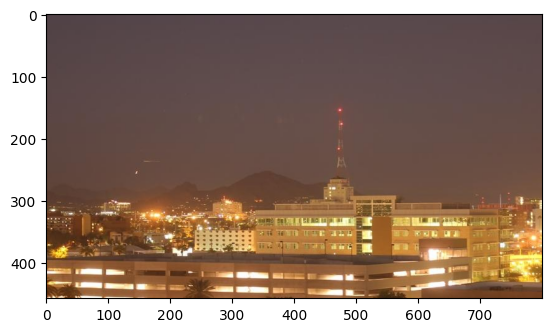

In [3]:
train_dir = "/content/drive/MyDrive/Machine Learning/images/images/training"
test_dir = "/content/drive/MyDrive/Machine Learning/images/images/test"

def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

train_img = load_dataset(train_dir)

# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

random_img_viz(train_img)

Shape	: (600, 1100, 3)
Label	: 1


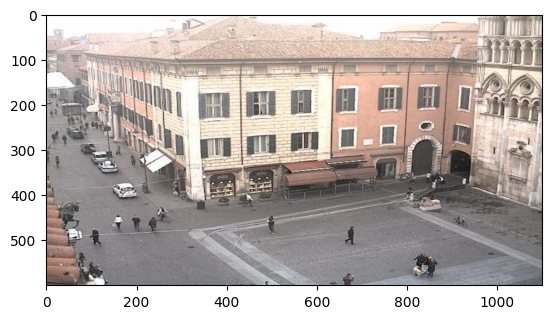

In [4]:
def standarized_input(image):
    std_img = cv2.resize(image, (1100,600))

    return std_img

def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

train_std_img_list = preprocess(train_img)

random_img_viz(train_std_img_list)

Akurasi: 98.12%

Laporan Klasifikasi:
              precision    recall  f1-score   support

       night       0.99      0.97      0.98        80
         day       0.98      0.99      0.98        80

    accuracy                           0.98       160
   macro avg       0.98      0.98      0.98       160
weighted avg       0.98      0.98      0.98       160

Label Asli			: day
Label Prediksi	: day


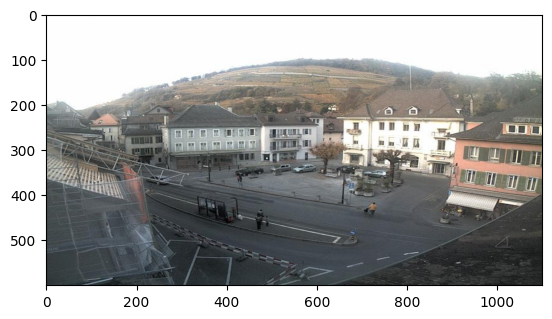

In [12]:
# Fungsi untuk mengekstrak fitur histogram dari gambar
def extract_histogram(image, bins=32):
    # Mengubah gambar ke dalam ruang warna HSV (berguna untuk ekstraksi fitur berbasis warna)
    hsv_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Menghitung histogram untuk setiap channel (H, S, V) dan menormalisasi
    hist_h = cv2.calcHist([hsv_img], [0], None, [bins], [0, 256])
    hist_s = cv2.calcHist([hsv_img], [1], None, [bins], [0, 256])
    hist_v = cv2.calcHist([hsv_img], [2], None, [bins], [0, 256])

    # Normalisasi histogram
    hist_h = cv2.normalize(hist_h, hist_h).flatten()
    hist_s = cv2.normalize(hist_s, hist_s).flatten()
    hist_v = cv2.normalize(hist_v, hist_v).flatten()

    # Menggabungkan histogram dari ketiga channel menjadi satu vektor fitur
    hist_features = np.concatenate([hist_h, hist_s, hist_v])

    return hist_features

# Fungsi untuk memproses daftar gambar dan mengekstrak fitur serta labelnya
def extract_features_and_labels(img_list, bins=32):
    features = []  # Menyimpan fitur dari gambar
    labels = []    # Menyimpan label dari gambar

    for item in img_list:
        image = item[0]
        label = item[1]

        # Ekstraksi fitur histogram dari gambar
        hist_features = extract_histogram(image, bins=bins)

        # Menambahkan fitur dan label ke daftar
        features.append(hist_features)
        labels.append(label)

    return np.array(features), np.array(labels)

# Ekstraksi fitur dan label untuk data latih
X_train, y_train = extract_features_and_labels(train_std_img_list)

# Memuat dataset pengujian
test_img = load_dataset(test_dir)
test_std_img_list = preprocess(test_img)

# Ekstraksi fitur dan label untuk data uji
X_test, y_test = extract_features_and_labels(test_std_img_list)

# Import library SVM dan evaluasi
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Standarisasi fitur (agar distribusi data seimbang)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Melatih model SVM dengan kernel RBF dan parameter C=100
svm_model = SVC(kernel='rbf', C=100)
svm_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada set data uji
y_pred = svm_model.predict(X_test_scaled)

# Evaluasi model dengan menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy * 100:.2f}%')

# Menampilkan laporan klasifikasi (classification report)
report = classification_report(y_test, y_pred, target_names=['night', 'day'])
print("\nLaporan Klasifikasi:")
print(report)

# Fungsi untuk visualisasi gambar uji acak dengan prediksi
def random_test_img_viz(img_list, predictions):
    rand_num = np.random.randint(0, len(img_list))  # Memilih gambar secara acak

    img = img_list[rand_num][0]
    actual_label = img_list[rand_num][1]
    predicted_label = predictions[rand_num]

    actual_str = 'day' if actual_label == 1 else 'night'
    predicted_str = 'day' if predicted_label == 1 else 'night'

    plt.imshow(img)
    print(f'Label Asli\t\t\t: {actual_str}')
    print(f'Label Prediksi\t: {predicted_str}')

# Visualisasi gambar uji acak dengan prediksi
random_test_img_viz(test_std_img_list, y_pred)